In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy.stats import mode

In [5]:
df = pd.read_csv('diabetes.csv')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Data Exploration

In [8]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Memory Optimizations

In [15]:
df.shape

(768, 9)

In [14]:
memory = df.memory_usage()
print(memory, sum(memory))


Index                         80
Pregnancies                 6144
Glucose                     6144
BloodPressure               6144
SkinThickness               6144
Insulin                     6144
BMI                         6144
DiabetesPedigreeFunction    6144
Age                         6144
Outcome                     6144
dtype: int64 55376


In [16]:
df.iloc[:,:9] = df.iloc[:,:9].astype('float16')

In [17]:
memory = df.memory_usage()
print(memory, sum(memory))

Index                         80
Pregnancies                 1536
Glucose                     1536
BloodPressure               1536
SkinThickness               1536
Insulin                     1536
BMI                         1536
DiabetesPedigreeFunction    1536
Age                         1536
Outcome                     1536
dtype: int64 13904


Check for summary statistics

In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.843750,inf,69.125000,20.546875,79.812500,32.000000,0.471924,33.250000,0.348877
std,3.371094,31.968750,19.359375,15.953125,inf,7.882812,0.331299,11.757812,0.477051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078003,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.296875,0.243774,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372559,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.593750,0.626221,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.125000,2.419922,81.000000,1.000000


In [20]:
df['Outcome'].value_counts(normalize=True)

0.0    0.651042
1.0    0.348958
Name: Outcome, dtype: float64

Outliers

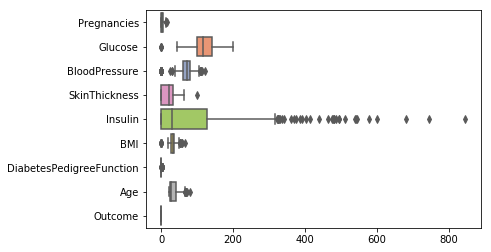

In [26]:
fig, ax = plt.subplots()
sns.boxplot(data=df, orient='h', palette='Set2')
plt.show()

Dealing with insulin

In [27]:
q75, q25 = np.percentile(df['Insulin'],[75,25])
iqr = q75-q25
print('IQR: ', iqr)
whisker = q75 + (1.5*iqr)
print(whisker)

IQR:  127.25
318.125


In [28]:
df['Insulin']=df['Insulin'].clip(upper=whisker)

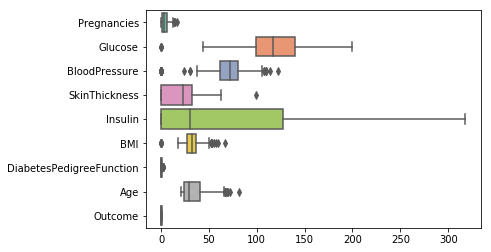

In [29]:
fig, ax = plt.subplots()
sns.boxplot(data=df, orient='h', palette='Set2')
plt.show()

Check missing values

In [30]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.593750,0.626953,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.593750,0.351074,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.296875,0.671875,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.093750,0.166992,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.093750,2.287109,33.0,1.0


In [35]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [36]:
(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null float16
Glucose                     768 non-null float16
BloodPressure               768 non-null float16
SkinThickness               768 non-null float16
Insulin                     768 non-null float16
BMI                         768 non-null float16
DiabetesPedigreeFunction    768 non-null float16
Age                         768 non-null float16
Outcome                     768 non-null float16
dtypes: float16(9)
memory usage: 13.6 KB


In [42]:
df.loc[:,['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']]=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0, np.NaN)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.593750,0.626953,50.0,1.0
1,1.0,85.0,66.0,29.0,NaN,26.593750,0.351074,31.0,0.0
2,8.0,183.0,64.0,NaN,NaN,23.296875,0.671875,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.093750,0.166992,21.0,0.0
4,NaN,137.0,40.0,35.0,168.0,43.093750,2.287109,33.0,1.0


In [47]:
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Dealing with missing values

Drop rows having NaN

In [45]:
print(df.shape)
nan_dropped = df.dropna()
print(nan_dropped.isnull().sum())
print(nan_dropped.shape)

(768, 9)
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
(336, 9)


Drop row/columns having more than certain percentages of NaNs

In [48]:
df.isnull().mean()
# df.isnull().sum()

Pregnancies                 0.144531
Glucose                     0.006510
BloodPressure               0.045573
SkinThickness               0.295573
Insulin                     0.486979
BMI                         0.014323
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

imputing the missing values

In [57]:
bins=[0,15,30,45,60,100]
group_names = ['malnutrition','Under_weight','Healthy','Over-Weight','Obese']
df['BMI_class'] = pd.cut(df['BMI'], bins, labels=group_names)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_class
0,6.0,148.0,72.0,35.0,NaN,33.593750,0.626953,50.0,1.0,Healthy
1,1.0,85.0,66.0,29.0,NaN,26.593750,0.351074,31.0,0.0,Under_weight
2,8.0,183.0,64.0,NaN,NaN,23.296875,0.671875,32.0,1.0,Under_weight
3,1.0,89.0,66.0,23.0,94.0,28.093750,0.166992,21.0,0.0,Under_weight
4,NaN,137.0,40.0,35.0,168.0,43.093750,2.287109,33.0,1.0,Healthy


In [61]:
df['BMI_class'].mode()[0]

'Healthy'

In [62]:
df['BMI_class'].fillna((df['BMI_class']).mode()[0], inplace=True)
df['Insulin'].fillna((df['Insulin']).mean(), inplace=True)
df['Pregnancies'].fillna((df['Pregnancies']).median, inplace=True)

In [63]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
BMI_class                     0
dtype: int64

Scaling

In [64]:
vector = np.random.chisquare(1,500)
print('Mean', np.mean(vector))
print('SD', np.std(vector))
print('Range', max(vector)-min(vector))

Mean 1.0713706708765078
SD 1.5441473773881618
Range 14.973109340783617


In [70]:
from sklearn.preprocessing import MinMaxScaler
range_scaler = MinMaxScaler()
range_scaler.fit(vector.reshape(-1,1))
range_scaled_vector = range_scaler.transform(vector.reshape(-1,1))

print('Mean', np.mean(range_scaled_vector))
print('Std', np.std(range_scaled_vector))
print('Range', max(range_scaled_vector)-min(range_scaled_vector))

Mean 0.07155294844468049
Std 0.1031280372195124
Range [1.]


standardization

In [72]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
standardizer.fit(vector.reshape(-1,1))
std_scaled_vector = standardizer.transform(vector.reshape(-1,1))
print('Mean', int(np.mean(std_scaled_vector)))
print('Std', int(np.std(std_scaled_vector)))
print('range', max(std_scaled_vector)-min(std_scaled_vector))

Mean 0
Std 0
range [9.69668411]


Reshape

In [79]:
vector.shape

(500,)

In [80]:
row_vector = vector.reshape(-1,1)
row_vector.shape

(500, 1)

In [82]:
col_vector = vector.reshape(1,-1)
col_vector.shape

(1, 500)

In [84]:
matrix = vector.reshape(10,50)
matrix.shape

(10, 50)

In [85]:
#Determine pivot table
df = pd.DataFrame({"A":  ["foo",  "foo",    "foo",   "foo",  "foo",    "bar",  "bar",   "bar",  "bar"],
                    "B": ["one",  "one",    "one",   "two",  "two",    "one",  "one",   "two",  "two"],
                    "C": ["small", "large", "large", "small","small", "large", "small", "small","large"],
                    "D": [1,       2,        2,       3,      3,        4,       5,      6,        7],
                    "E": [2,       4,        5,       5,      6,        6,       8,      9,        9]})

In [86]:
df.head()

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6


In [88]:
from pandas import *
table = pivot_table(df, values='D', index=['A','B'], columns=['C'], aggfunc=np.sum)
table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

crosstab

In [89]:
pd.crosstab(df['D'],df['B'], margins=True)

B,one,two,All
D,,,
1,1,0,1
2,2,0,2
3,0,2,2
4,1,0,1
5,1,0,1
6,0,1,1
7,0,1,1
All,5,4,9


Merging dataframes

In [93]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                       index=[0, 1, 2, 3])
    

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                       index=[4, 5, 6, 7])
    

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                       'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                       index=[8, 9, 10, 11])
    
frames = [df1,df2,df3]
# print(frames)
result = pd.concat(frames)
print(result)

      A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11


plotting

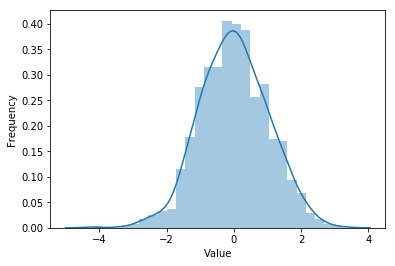

In [96]:
fig, axs = plt.subplots()
normal_dist = np.random.randn(1,1000)
normal_plot = sns.distplot(normal_dist)
normal_plot.set(xlabel='Value', ylabel ='Frequency')
plt.show()

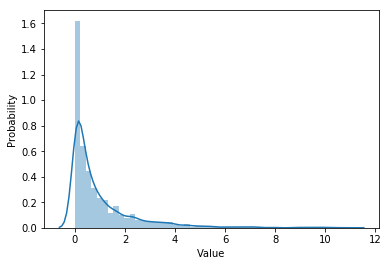

In [98]:
fig,axs = plt.subplots()
vector = np.random.chisquare(1,1500)
vector_plot = sns.distplot(vector)
vector_plot.set(xlabel='Value', ylabel='Probability')
plt.show()

In [109]:
from sklearn import datasets
iris = datasets.load_iris()


data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])

In [112]:
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
